In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the datasets
from google.colab import files
uploaded = files.upload()

# Verify the uploaded files
import os
print("Uploaded Files:")
print(os.listdir())  # Check the filenames

# Load the datasets using the correct filenames
stock_data = pd.read_csv('AdaniPorts.csv')
economic_data = pd.read_csv('economic_indicators_dataset_2010_2023.csv')

# Explore the data
print("Stock Data Preview:")
print(stock_data.head())
print("\nEconomic Data Preview:")
print(economic_data.head())


Saving AdaniPorts.csv to AdaniPorts.csv
Saving economic_indicators_dataset_2010_2023.csv to economic_indicators_dataset_2010_2023.csv
Uploaded Files:
['.config', 'economic_indicators_dataset_2010_2023.csv', 'AdaniPorts.csv', 'sample_data']
Stock Data Preview:
         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     

In [2]:
#loading the data and performing the data cleaning observing the missing values and replacing the missing values
import pandas as pd

# Load the data
stock_data = pd.read_csv('AdaniPorts.csv')
economic_data = pd.read_csv('economic_indicators_dataset_2010_2023.csv')

# Display initial data previews
print("Stock Data Preview:")
print(stock_data.head())
print("\nEconomic Data Preview:")
print(economic_data.head())

# Check the info for both datasets
print("\nStock Data Info:")
print(stock_data.info())
print("\nEconomic Data Info:")
print(economic_data.info())

# Check for missing values
print("\nMissing Values in Stock Data:")
print(stock_data.isnull().sum())
print("\nMissing Values in Economic Data:")
print(economic_data.isnull().sum())

# Handle missing values (fill with mean for numeric columns)
# For stock data, select only numeric columns
numeric_stock_columns = stock_data.select_dtypes(include=['float64', 'int64']).columns
stock_data[numeric_stock_columns] = stock_data[numeric_stock_columns].fillna(stock_data[numeric_stock_columns].mean())

# For economic data, select only numeric columns
numeric_economic_columns = economic_data.select_dtypes(include=['float64', 'int64']).columns
economic_data[numeric_economic_columns] = economic_data[numeric_economic_columns].fillna(economic_data[numeric_economic_columns].mean())

# Verify that missing values are handled
print("\nMissing Values in Stock Data After Filling:")
print(stock_data.isnull().sum())
print("\nMissing Values in Economic Data After Filling:")
print(economic_data.isnull().sum())


Stock Data Preview:
         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088 

In [3]:
# Transform Data

# Convert 'Date' columns to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
economic_data['Date'] = pd.to_datetime(economic_data['Date'])

# Create Year and Month columns for stock data
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month

# Create Year and Month columns for economic data
economic_data['Year'] = economic_data['Date'].dt.year
economic_data['Month'] = economic_data['Date'].dt.month

# Optional: Display the transformed data
print("\nTransformed Stock Data Preview:")
print(stock_data[['Date', 'Year', 'Month']])
print("\nTransformed Economic Data Preview:")
print(economic_data[['Date', 'Year', 'Month']])

# Continue with the next steps, such as creating dimension and
# fact tables...


Transformed Stock Data Preview:
           Date  Year  Month
0    2007-11-27  2007     11
1    2007-11-28  2007     11
2    2007-11-29  2007     11
3    2007-11-30  2007     11
4    2007-12-03  2007     12
...         ...   ...    ...
3317 2021-04-26  2021      4
3318 2021-04-27  2021      4
3319 2021-04-28  2021      4
3320 2021-04-29  2021      4
3321 2021-04-30  2021      4

[3322 rows x 3 columns]

Transformed Economic Data Preview:
          Date  Year  Month
0   2010-01-31  2010      1
1   2010-01-31  2010      1
2   2010-01-31  2010      1
3   2010-02-28  2010      2
4   2010-02-28  2010      2
..         ...   ...    ...
495 2023-08-31  2023      8
496 2023-08-31  2023      8
497 2023-09-30  2023      9
498 2023-10-31  2023     10
499 2023-11-30  2023     11

[500 rows x 3 columns]


In [4]:
# creating dimension and fact tables
# Create Date Dimension
date_dimension = stock_data[['Date']].drop_duplicates()
date_dimension['Year'] = stock_data['Year']
date_dimension['Month'] = stock_data['Month']
date_dimension['Day'] = stock_data['Date'].dt.day
date_dimension['Quarter'] = stock_data['Date'].dt.quarter
date_dimension['Weekday'] = stock_data['Date'].dt.day_name()
date_dimension = date_dimension.drop_duplicates()  # Ensure unique dates
date_dimension.to_csv('date_dimension.csv', index=False)  # Save to CSV for reference
print("\nDate Dimension Preview:")
print(date_dimension.head())

# Create Stock Symbol Dimension
# Since we need to create a placeholder for 'Company Name' and other columns, adjust according to your dataset
if 'Symbol' in stock_data.columns:
    stock_symbol_dimension = stock_data[['Symbol']].drop_duplicates()
    stock_symbol_dimension['Company Name'] = "Company Name Placeholder"  # Placeholder for missing data
    stock_symbol_dimension['Industry'] = "Industry Placeholder"  # Placeholder for Industry
    stock_symbol_dimension['Sector'] = "Sector Placeholder"  # Placeholder for Sector
    stock_symbol_dimension.to_csv('stock_symbol_dimension.csv', index=False)  # Save to CSV for reference
    print("\nStock Symbol Dimension Preview:")
    print(stock_symbol_dimension.head())
else:
    print("Error: 'Symbol' column not found in stock_data.")

# Create Country Dimension
# Adjust to match the country column in economic_data if necessary
if 'Country' in economic_data.columns:
    country_dimension = economic_data[['Country']].drop_duplicates()
    country_dimension['Country Name'] = country_dimension['Country']  # Rename for clarity
    country_dimension.to_csv('country_dimension.csv', index=False)  # Save to CSV for reference
    print("\nCountry Dimension Preview:")
    print(country_dimension.head())
else:
    print("Error: 'Country' column not found in economic_data.")

# Create Stock Prices Fact Table
stock_prices_fact = stock_data[['Date', 'Symbol', 'Open', 'Close', 'High', 'Low', 'Volume']].copy()
stock_prices_fact.to_csv('stock_prices_fact.csv', index=False)  # Save to CSV for reference
print("\nStock Prices Fact Table Preview:")
print(stock_prices_fact.head())

# Create Economic Indicators Fact Table
# Update with actual names of economic indicators based on your dataset
economic_indicators_fact = economic_data[['Date', 'Country', 'Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)','Stock Index Value']].copy()
economic_indicators_fact.to_csv('economic_indicators_fact.csv', index=False)  # Save to CSV for reference
print("\nEconomic Indicators Fact Table Preview:")
print(economic_indicators_fact.head())


Date Dimension Preview:
        Date  Year  Month  Day  Quarter    Weekday
0 2007-11-27  2007     11   27        4    Tuesday
1 2007-11-28  2007     11   28        4  Wednesday
2 2007-11-29  2007     11   29        4   Thursday
3 2007-11-30  2007     11   30        4     Friday
4 2007-12-03  2007     12    3        4     Monday

Stock Symbol Dimension Preview:
          Symbol              Company Name              Industry  \
0     MUNDRAPORT  Company Name Placeholder  Industry Placeholder   
1023  ADANIPORTS  Company Name Placeholder  Industry Placeholder   

                  Sector  
0     Sector Placeholder  
1023  Sector Placeholder  

Country Dimension Preview:
  Country Country Name
0  Brazil       Brazil
1  France       France
2     USA          USA
4  Canada       Canada
6   Japan        Japan

Stock Prices Fact Table Preview:
        Date      Symbol    Open   Close     High    Low    Volume
0 2007-11-27  MUNDRAPORT  770.00  962.90  1050.00  770.0  27294366
1 2007-11-28  MU

Index(['Date', 'Country', 'Inflation Rate (%)', 'GDP Growth Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value',
       'Year', 'Month'],
      dtype='object')


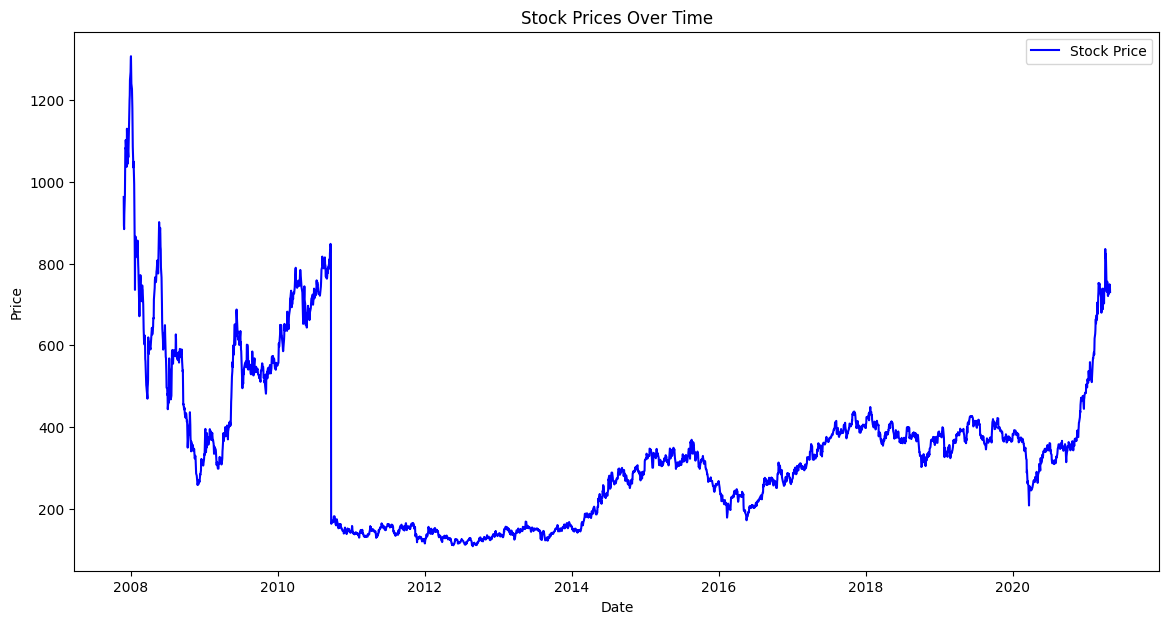

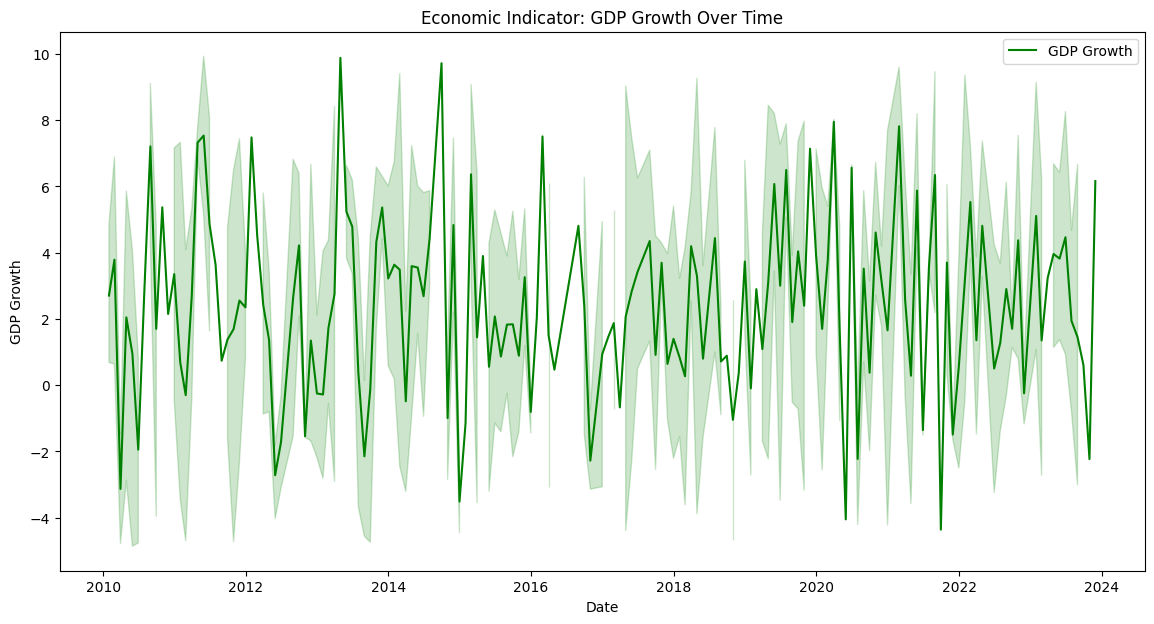

In [5]:
#VISUALISATION
# TIME SERIES PLOT
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in economic data
print(economic_data.columns)

# Time Series Plot for Stock Prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=stock_data, x='Date', y='Close', label='Stock Price', color='blue')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Time Series Plot for Economic Indicators
# Replace 'GDP Growth Rate (%)' with the actual column name from your economic_data
plt.figure(figsize=(14, 7))
sns.lineplot(data=economic_data, x='Date', y='GDP Growth Rate (%)', label='GDP Growth', color='green')
plt.title('Economic Indicator: GDP Growth Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()
plt.show()

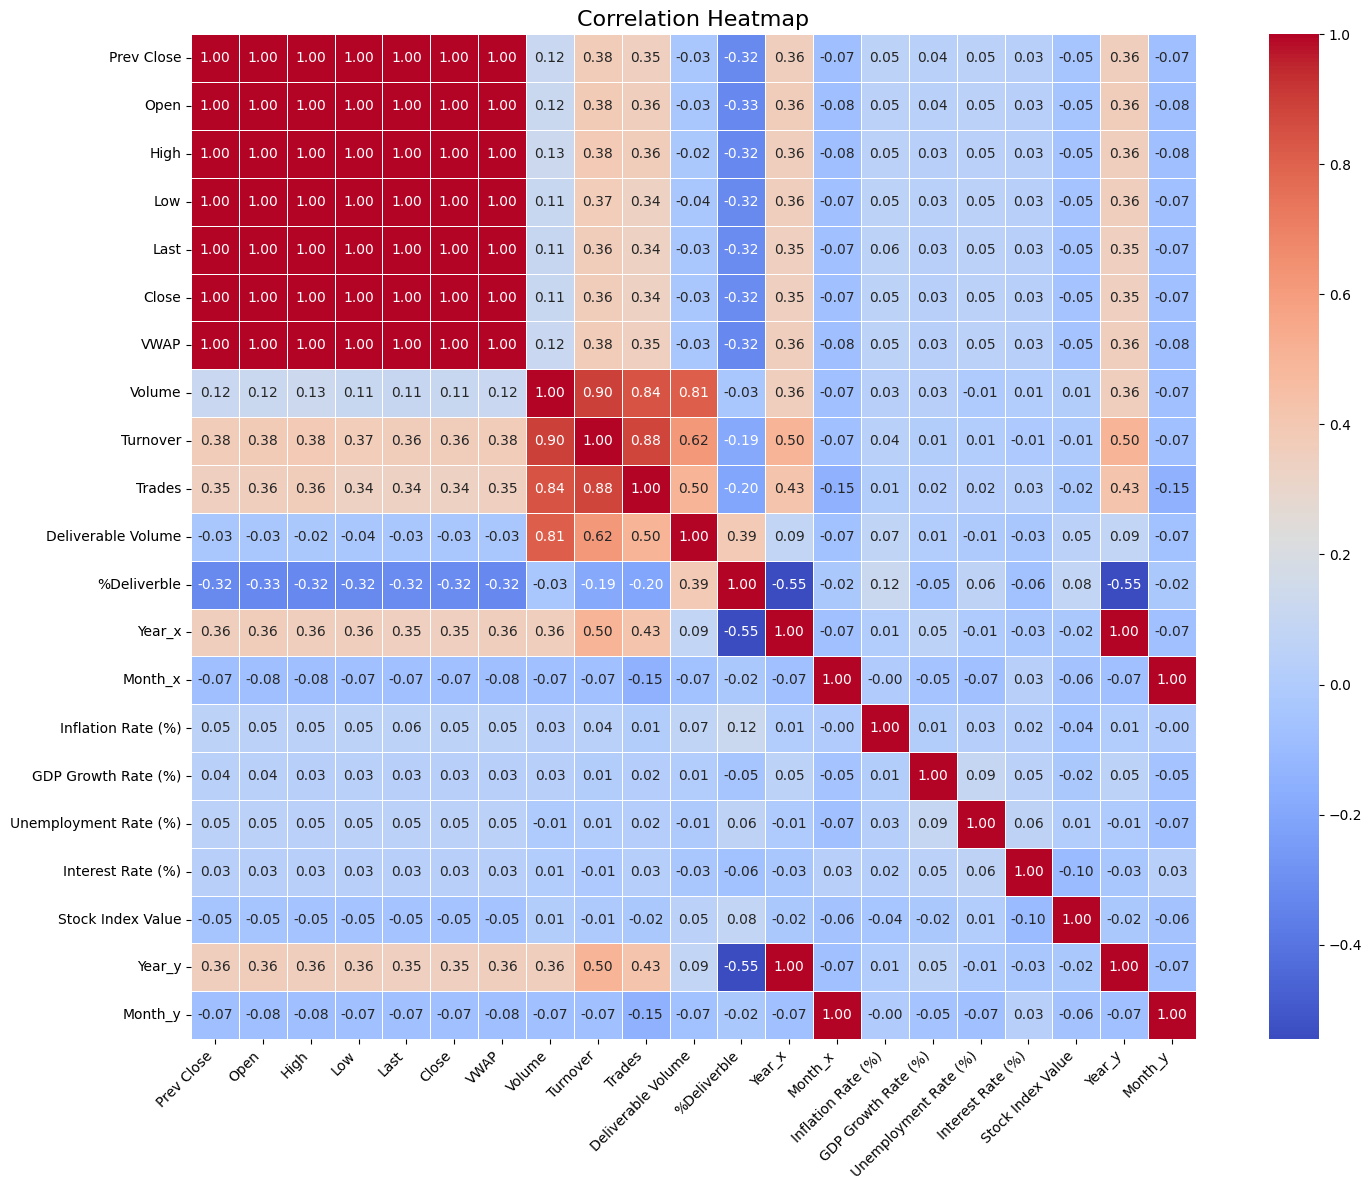

In [6]:
#CORRELATION HEAT MAP
# Assuming you have both stock prices and economic indicators in the same DataFrame
combined_data = stock_data.merge(economic_data, on='Date', how='inner')

# Select only numeric columns for correlation calculation
numeric_columns = combined_data.select_dtypes(include=['number']).columns
# Calculate the correlation matrix using only numeric columns
correlation_matrix = combined_data[numeric_columns].corr()

# Create a heatmap with adjustments for clarity
plt.figure(figsize=(16, 12))  # Increase figure size for better readability
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            square=True,
            annot_kws={"size": 10},  # Increase font size of annotations
            linewidths=.5)  # Add lines between cells for better separation
plt.title('Correlation Heatmap', fontsize=16)  # Increase title font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)  # Increase y-axis label font size
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

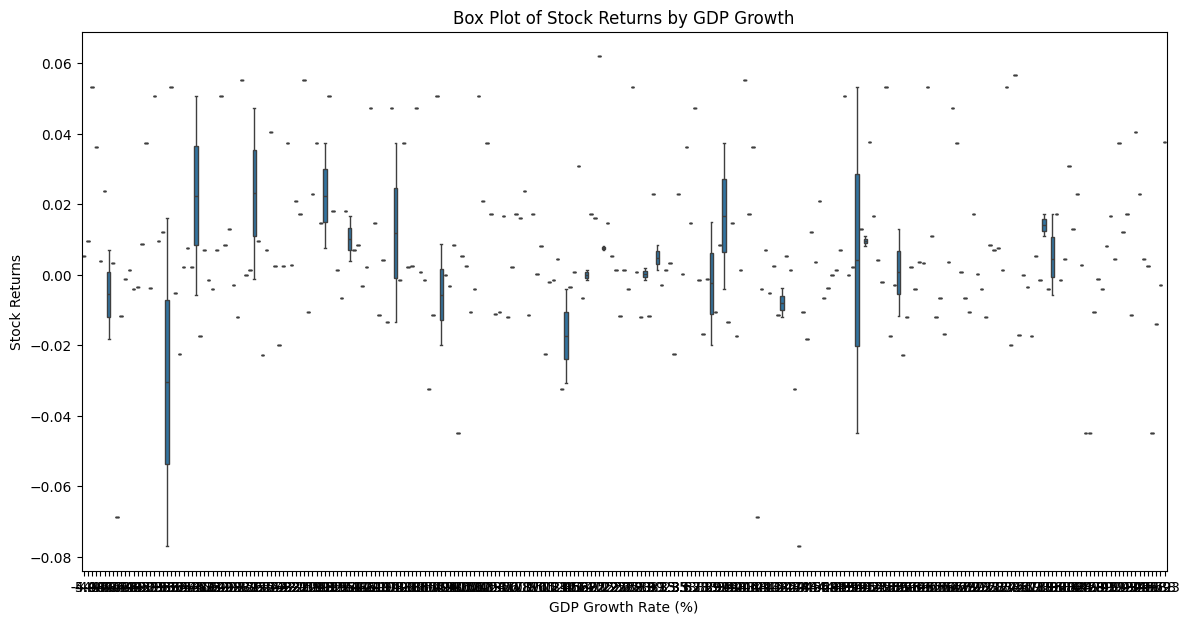

In [7]:
# box plot
# Calculate stock returns
stock_data['Returns'] = stock_data['Close'].pct_change()

# Merge stock data with economic data on 'Date'
combined_data = stock_data.merge(economic_data[['Date', 'GDP Growth Rate (%)']], on='Date', how='inner')

# Box Plot of Stock Returns by Economic Indicator (GDP Growth)
plt.figure(figsize=(14, 7))
sns.boxplot(data=combined_data, x='GDP Growth Rate (%)', y='Returns')  # Replace 'GDP Growth' with the actual column name if needed
plt.title('Box Plot of Stock Returns by GDP Growth')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Stock Returns')
plt.show()


In [8]:
# statistical analysis
from statsmodels.tsa.stattools import adfuller

def test_stationarity(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Test stationarity for stock prices
test_stationarity(stock_data['Close'].dropna())

# Test stationarity for an economic indicator (e.g., GDP Growth Rate)
test_stationarity(economic_data['GDP Growth Rate (%)'].dropna())




ADF Statistic: -3.4730976831334264
p-value: 0.008705487700678907
Critical Values:
   1%: -3.4323235733856885
   5%: -2.862412008588944
   10%: -2.5672341879086087
ADF Statistic: -23.505485044736265
p-value: 0.0
Critical Values:
   1%: -3.4435228622952065
   5%: -2.867349510566146
   10%: -2.569864247011056


Correlation Matrix:
                       Prev Close      Open      High       Low      Last  \
Prev Close               1.000000  0.999737  0.999533  0.999490  0.999067   
Open                     0.999737  1.000000  0.999358  0.999541  0.998712   
High                     0.999533  0.999358  1.000000  0.999102  0.999315   
Low                      0.999490  0.999541  0.999102  1.000000  0.999192   
Last                     0.999067  0.998712  0.999315  0.999192  1.000000   
Close                    0.999179  0.998827  0.999428  0.999288  0.999965   
VWAP                     0.999611  0.999369  0.999874  0.999470  0.999592   
Volume                   0.116888  0.121926  0.128172  0.108817  0.106209   
Turnover                 0.375385  0.379169  0.384258  0.367404  0.360740   
Trades                   0.349846  0.355492  0.360309  0.340892  0.336421   
Deliverable Volume      -0.030246 -0.028029 -0.022995 -0.035141 -0.032370   
%Deliverble             -0.322082 -0.325458 -0.324707 -0

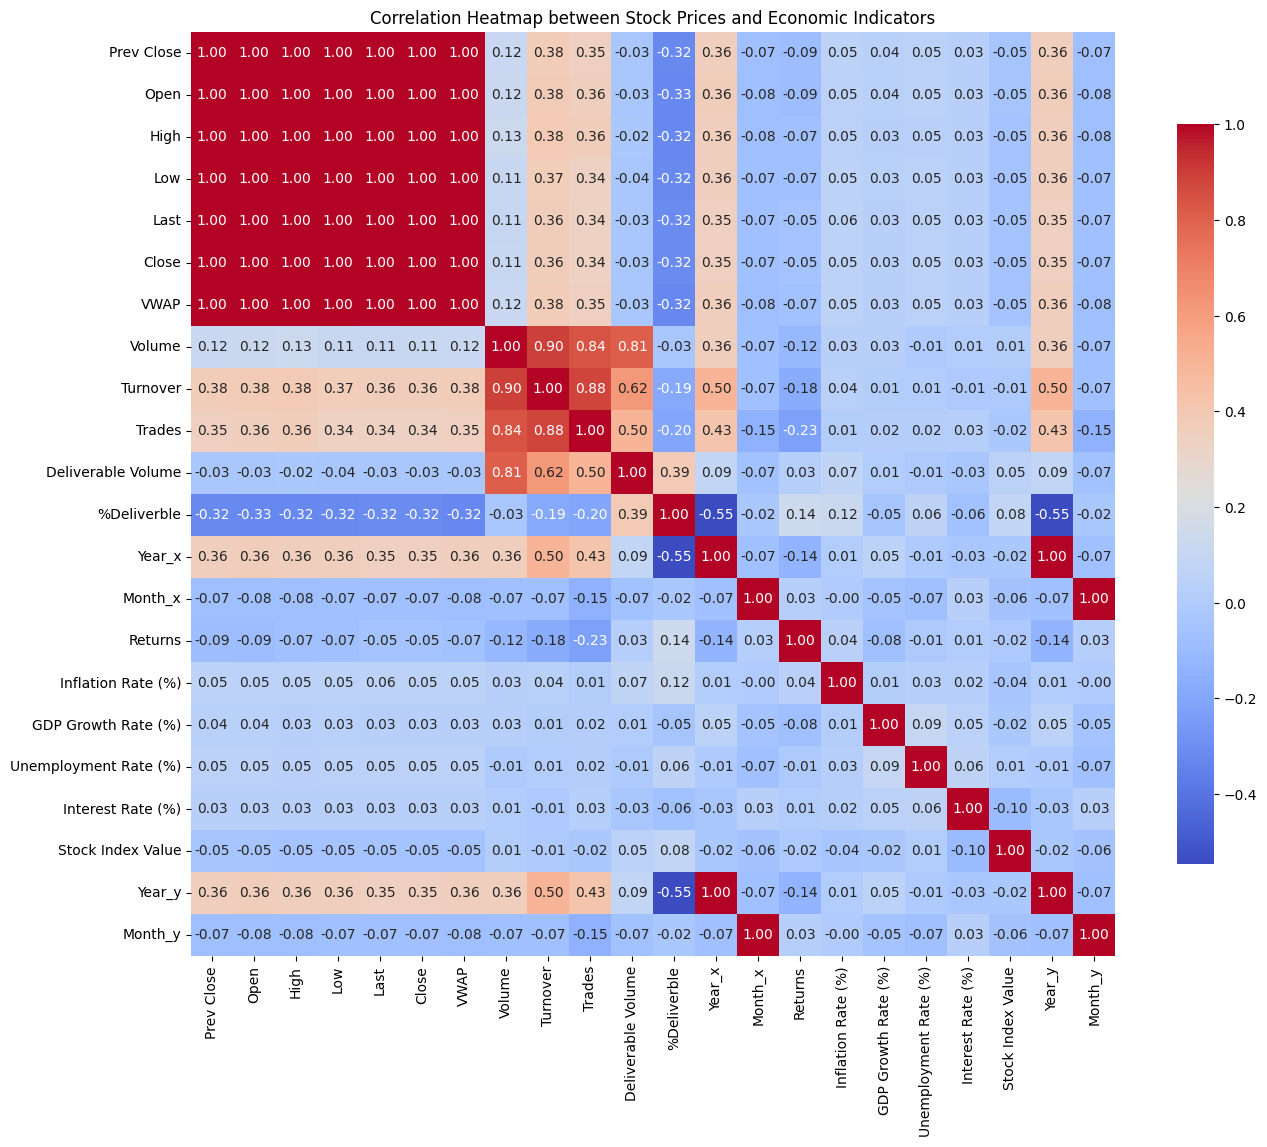

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge stock data with economic data on 'Date'
combined_data = stock_data.merge(economic_data, on='Date', how='inner')

# Select only numeric columns for correlation calculation
numeric_columns = combined_data.select_dtypes(include=['number']).columns

# Calculate correlation matrix using only numeric columns
correlation_matrix = combined_data[numeric_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(16,12))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title and labels
plt.title('Correlation Heatmap between Stock Prices and Economic Indicators')
plt.show()

In [10]:
#feature engineering code
# Feature Engineering

# 1. Moving Averages of Stock Prices
stock_data['MA_5'] = stock_data['Close'].rolling(window=5).mean()  # 5-day moving average
stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()  # 20-day moving average

# 2. Lagged Versions of Economic Indicators
# Create lagged features for GDP Growth Rate
economic_data['GDP_Growth_Lag1'] = economic_data['GDP Growth Rate (%)'].shift(1)
economic_data['Inflation_Lag1'] = economic_data['Inflation Rate (%)'].shift(1)
economic_data['Unemployment_Lag1'] = economic_data['Unemployment Rate (%)'].shift(1)

# 3. Ratios (Example: Debt-to-GDP ratio, you would need a debt column)
# Assuming there's a column 'Debt' in your economic data
# economic_data['Debt_to_GDP'] = economic_data['Debt'] / economic_data['GDP']

# 4. Combine the DataFrames (assuming 'Date' is the common column)
combined_data = pd.merge(stock_data, economic_data, on='Date', how='inner')

# Drop rows with NaN values created by moving averages and lagging
combined_data.dropna(inplace=True)

# 5. Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# Select economic indicators for PCA
economic_indicators = combined_data[['GDP Growth Rate (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)']]

# Standardizing the data before PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(economic_indicators)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
combined_data = pd.concat([combined_data.reset_index(drop=True), pca_df], axis=1)

# Display the modified DataFrame with new features
print("\nCombined Data with New Features Preview:")
print(combined_data.head())



Combined Data with New Features Preview:
        Date      Symbol Series  Prev Close   Open   High     Low    Last  \
0 2010-03-31  MUNDRAPORT     EQ      786.60  789.0  799.0  785.00  788.10   
1 2010-03-31  MUNDRAPORT     EQ      786.60  789.0  799.0  785.00  788.10   
2 2010-04-30  MUNDRAPORT     EQ      741.15  742.2  749.9  734.35  738.95   
3 2010-04-30  MUNDRAPORT     EQ      741.15  742.2  749.9  734.35  738.95   
4 2010-04-30  MUNDRAPORT     EQ      741.15  742.2  749.9  734.35  738.95   

   Close    VWAP  ...  Unemployment Rate (%)  Interest Rate (%)  \
0  789.6  791.15  ...                   3.31               3.85   
1  789.6  791.15  ...                   4.10               8.22   
2  739.0  739.93  ...                  10.77               9.89   
3  739.0  739.93  ...                   4.82               3.99   
4  739.0  739.93  ...                  11.92               4.52   

   Stock Index Value  Year_y  Month_y  GDP_Growth_Lag1  Inflation_Lag1  \
0           38146.

In [11]:
# MODELLING
# supervised learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = combined_data[['GDP Growth Rate (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'MA_5', 'MA_20']]
target = combined_data['Close']  # Predicting the closing stock price

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 2. Random Forest
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# 3. Decision Tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# 4. Support Vector Machine
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)

# 5. K-Nearest Neighbors
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Evaluate the models
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_tree))
print("SVM MSE:", mean_squared_error(y_test, y_pred_svm))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))


Linear Regression MSE: 59.13278352461859
Random Forest MSE: 22.62430620614034
Decision Tree MSE: 12.621578947368414
SVM MSE: 15506.057902725383
KNN MSE: 67.15281403508754


In [12]:
# time series model
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Prepare the data for LSTM
# Using 'Close' prices as target and reshaping the data
look_back = 60  # number of previous days to consider
data = combined_data['Close'].values
data = data.reshape(-1, 1)

# Function to create datasets for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(data, look_back)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict and evaluate
y_pred_lstm = model.predict(X_test)
print("LSTM MSE:", mean_squared_error(y_test, y_pred_lstm))


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 122670.4219
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 114742.4922
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 111511.6172
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 108085.2109
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 109430.8125
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 110083.7812
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 103631.8672
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 110775.5312
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 107581.9531
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 111083.2266
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 116442.3672
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 110200.0703
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 113747.3281
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 100080.9531
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 

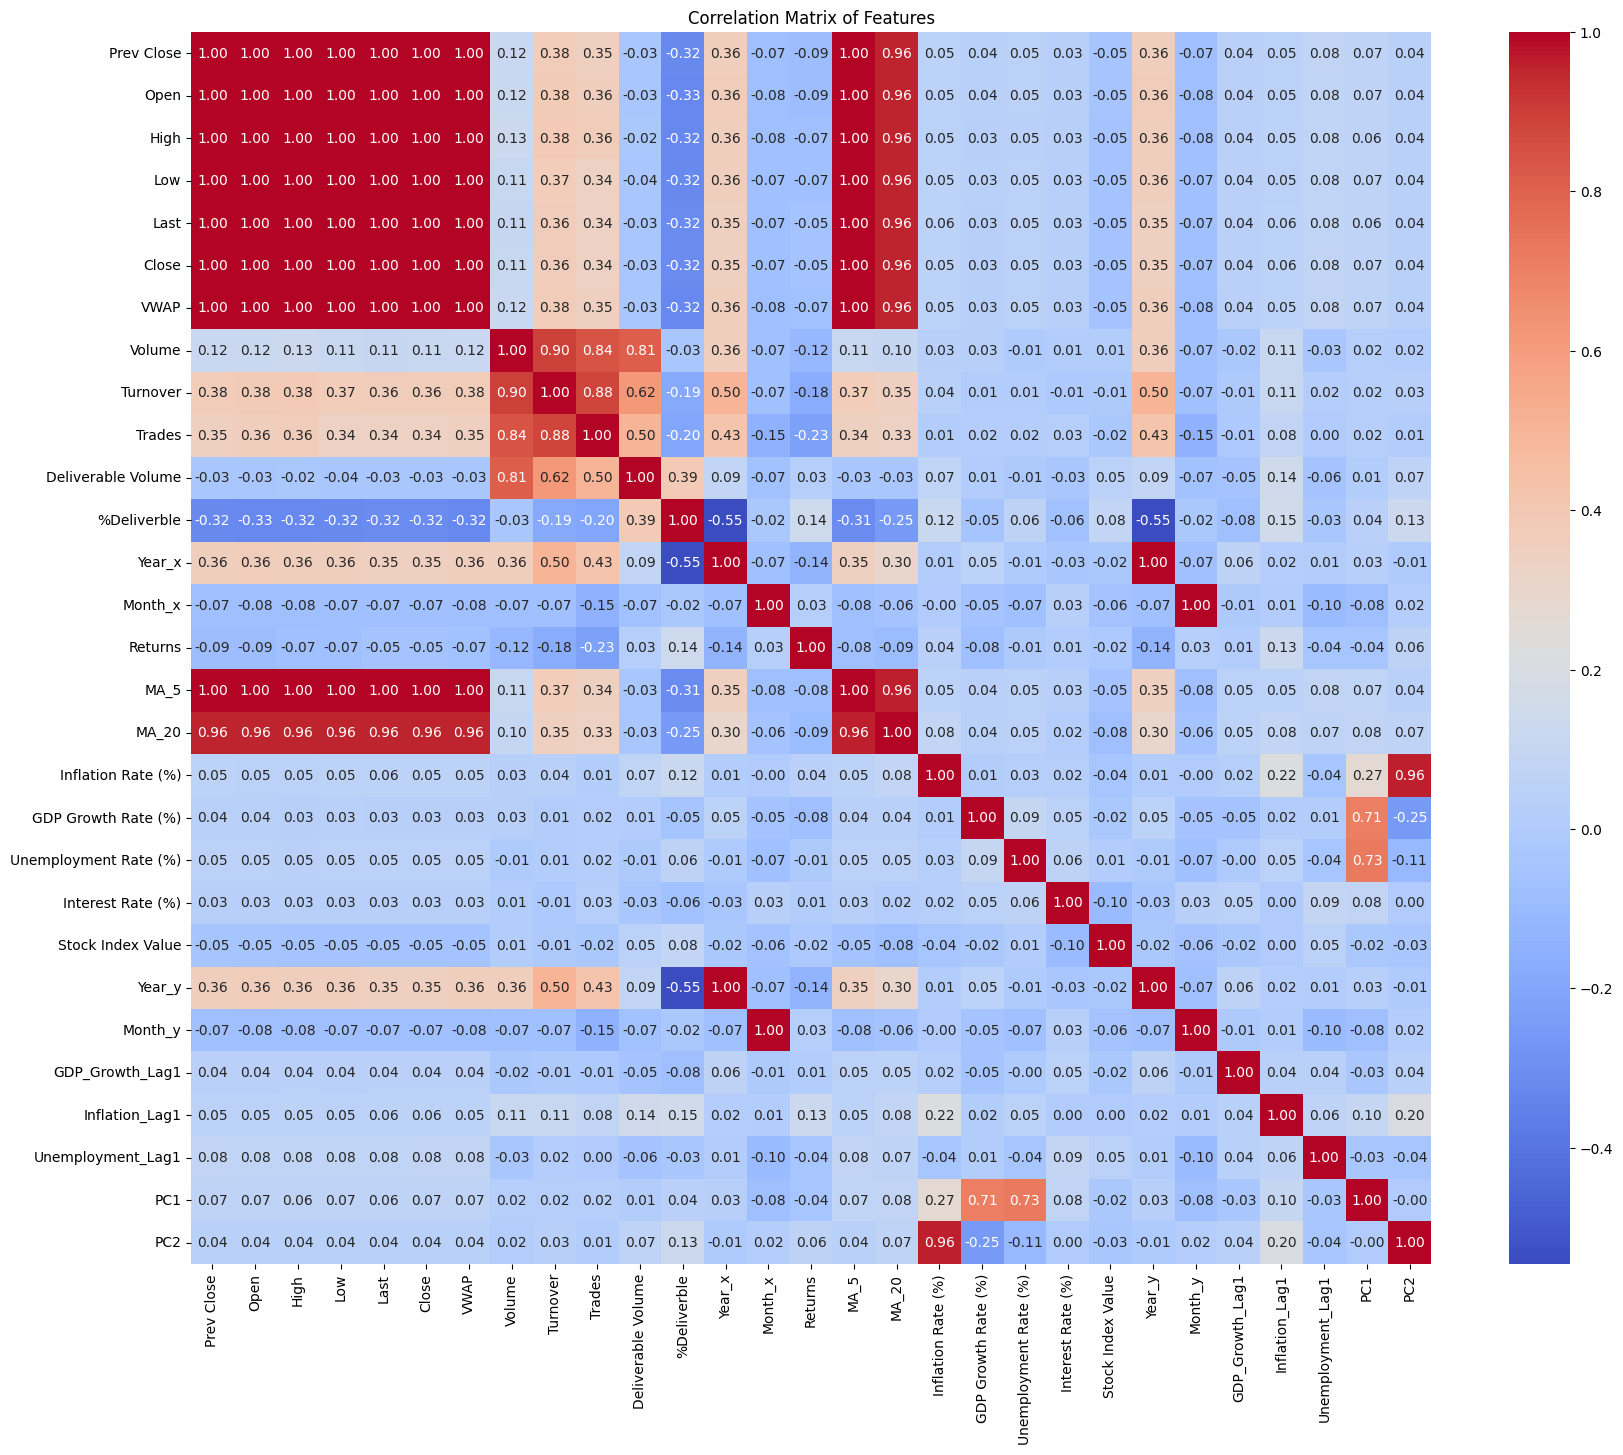

In [13]:
# CORRELATION ANALYSIS
# Correlation Matrix

# Select only numeric columns for correlation calculation
numeric_columns = combined_data.select_dtypes(include=['number']).columns

# Calculate correlation matrix using only numeric columns
correlation_matrix = combined_data[numeric_columns].corr()

plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [14]:
# Causality Testing (Granger-Causality)
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger causality test (max lag of 5 days for example)
max_lag = 5
results = grangercausalitytests(combined_data[['Close', 'GDP Growth Rate (%)']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6843  , p=0.1025  , df_denom=280, df_num=1
ssr based chi2 test:   chi2=2.7131  , p=0.0995  , df=1
likelihood ratio test: chi2=2.7002  , p=0.1003  , df=1
parameter F test:         F=2.6843  , p=0.1025  , df_denom=280, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8662  , p=0.0586  , df_denom=277, df_num=2
ssr based chi2 test:   chi2=5.8358  , p=0.0540  , df=2
likelihood ratio test: chi2=5.7762  , p=0.0557  , df=2
parameter F test:         F=2.8662  , p=0.0586  , df_denom=277, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2085  , p=0.0236  , df_denom=274, df_num=3
ssr based chi2 test:   chi2=9.8715  , p=0.0197  , df=3
likelihood ratio test: chi2=9.7020  , p=0.0213  , df=3
parameter F test:         F=3.2085  , p=0.0236  , df_denom=274, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4104  , p=0.0496  

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [15]:
# Stationarity Tests (KPSS and Phillips-Perron)
from statsmodels.tsa.stattools import kpss, adfuller

# KPSS Test
def kpss_test(series):
    statistic, p_value, _, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')
    return statistic, p_value

# Apply KPSS test on 'Close' prices
kpss_test(combined_data['Close'])

# ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    return result[0], result[1]

# Apply ADF test on 'Close' prices
adf_test(combined_data['Close'])


KPSS Statistic: 0.6693428400402714
p-value: 0.016332469087248048
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF Statistic: -2.500725814046615
p-value: 0.1152978262299863
Critical Values: {'1%': np.float64(-3.453670163592738), '5%': np.float64(-2.8718077069772248), '10%': np.float64(-2.5722411158835796)}


(np.float64(-2.500725814046615), np.float64(0.1152978262299863))

In [17]:
# MODEL EVALUATION
# Model Evaluation Metrics for Regression Models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
stock_data = pd.read_csv('AdaniPorts.csv')
economic_data = pd.read_csv('economic_indicators_dataset_2010_2023.csv')

# Data Preprocessing
# Convert 'Date' columns to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
economic_data['Date'] = pd.to_datetime(economic_data['Date'])

# Create Year and Month columns for stock data
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month

# Merge the datasets
combined_data = pd.merge(stock_data, economic_data, on='Date', how='inner')

# Feature and Target Selection
X = combined_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month']]  # Features
y = combined_data['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and predict with each model
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Fixed RMSE calculation
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"R-squared: {r2:.4f}\n")

# Evaluate all regression models
for model_name, y_pred in predictions.items():
    evaluate_model(y_test, y_pred, model_name)


Linear Regression Evaluation:
Mean Absolute Error (MAE): 3.0223
Root Mean Square Error (RMSE): 3.7527
R-squared: 0.9994

Random Forest Evaluation:
Mean Absolute Error (MAE): 1.3853
Root Mean Square Error (RMSE): 2.9166
R-squared: 0.9996

Decision Tree Evaluation:
Mean Absolute Error (MAE): 0.2211
Root Mean Square Error (RMSE): 1.2637
R-squared: 0.9999

Support Vector Machine Evaluation:
Mean Absolute Error (MAE): 116.5243
Root Mean Square Error (RMSE): 152.8516
R-squared: 0.0119

K-Nearest Neighbors Evaluation:
Mean Absolute Error (MAE): 38.0042
Root Mean Square Error (RMSE): 65.8433
R-squared: 0.8166



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0077
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0013
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0012
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 9.9453e-04
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 8.3744e-04
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 7.8684e-04
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 7.8382e-04
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 6.7419e-04
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 6.8364e-04
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 6.5862e-04
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 6.3858e-04
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 6.0607e-04
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 5.3380e-04
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 5.3670e-04
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━━━━━

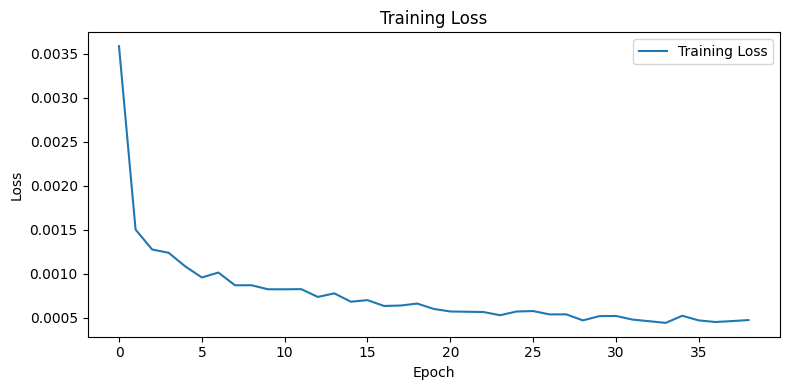

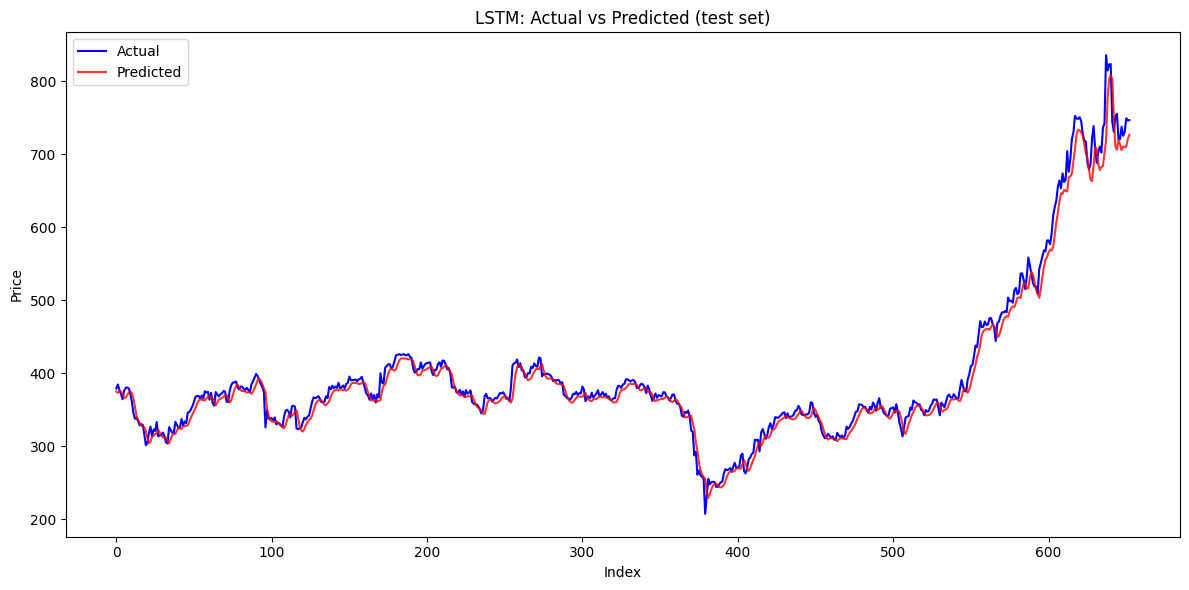

In [18]:
# Updated LSTM script with RMSE fix and small improvements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf

# ===== Reproducibility =====
np.random.seed(42)
tf.random.set_seed(42)

# ===== Load & prepare data =====
stock_data = pd.read_csv('AdaniPorts.csv')   # update filename if needed
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date').reset_index(drop=True)

# Use only Close price for univariate LSTM
data = stock_data[['Close']].values.astype(float)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# ===== helper to create sequences =====
def create_dataset(data_arr, time_step=60):
    X, y = [], []
    for i in range(len(data_arr) - time_step - 1):
        X.append(data_arr[i:(i + time_step), 0])
        y.append(data_arr[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# ===== train/test split =====
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ===== build model =====
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# early stopping
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# ===== train =====
history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# ===== predict & inverse scale =====
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)                # shape (n,1)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))  # shape (n,1)

# flatten for metrics (sklearn expects 1D arrays)
y_pred_1d = y_pred.ravel()
y_test_1d = y_test_actual.ravel()

# ===== evaluation (RMSE computed via sqrt of MSE) =====
mae = mean_absolute_error(y_test_1d, y_pred_1d)
mse = mean_squared_error(y_test_1d, y_pred_1d)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_1d, y_pred_1d)

print("LSTM Evaluation:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# ===== plots =====
# training loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', alpha=0.8)
plt.title('LSTM: Actual vs Predicted (test set)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0734
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0063
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0029
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0024
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0022
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0021
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0022
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0022
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0022
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0022
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Fold Evaluation: MAE = 58.4482, RMSE = 78.3688
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0191
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0028
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0024
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0021
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0019
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0017
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0016
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0015
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0013
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0013
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Fold Evaluation: MAE = 6.7885, RMSE = 9.0064
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0136
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0011
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0010
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 9.4352e-04
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 8.5558e-04
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 7.6354e-04
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.9558e-04
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 6.3227e-04
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.7627e-04
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.2580e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Fold Evaluation: MAE = 9.4962, RMSE = 12.3189
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0081
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0014
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0012
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0010
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 9.1507e-04
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.2598e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 7.5437e-04
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 6.9354e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 6.4116e-04
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.9697e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Fold Evaluation: MAE = 10.5123, RMSE = 13.3750
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0072
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0011
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 9.0747e-04
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 8.1475e-04
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 7.5212e-04
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 7.0410e-04
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 6.6416e-04
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 6.3126e-04
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 6.0687e-04
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 5.9335e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Fold Evaluation: MAE = 11.3999, RMSE = 16.6744

Average MAE: 19.3290
Average RMSE: 25.9487


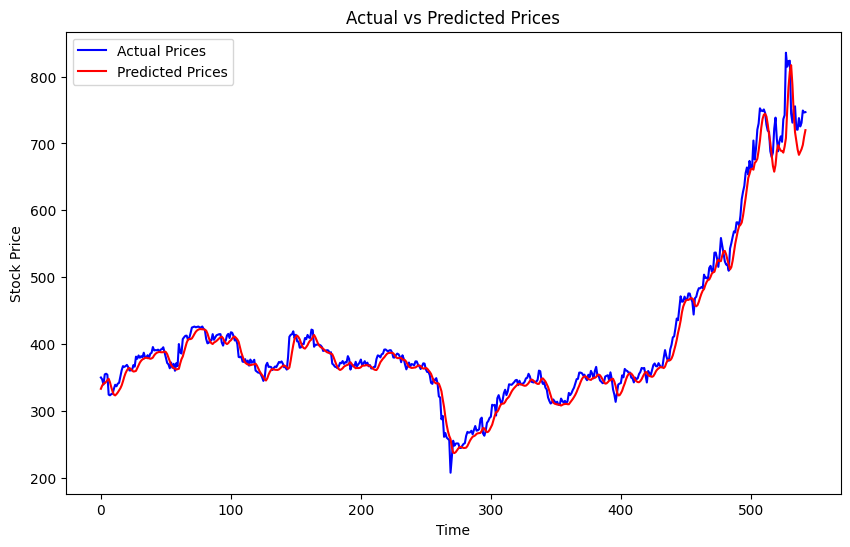

In [20]:
# Step-by-Step Time-Series Cross-Validation Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

# Load the stock data (update path if needed)
stock_data = pd.read_csv('AdaniPorts.csv')

# Convert 'Date' column to datetime and sort by date
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')

# Use 'Close' price for prediction and scale it
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data['Scaled_Close'] = scaler.fit_transform(stock_data[['Close']])

# Prepare the data for LSTM
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Use 60 days to predict the next day's price
scaled_data = stock_data['Scaled_Close'].values.reshape(-1, 1)
X, y = create_lstm_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Time-Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []
rmse_scores = []

# LSTM model training and evaluation in each fold
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate MAE and RMSE (manual sqrt for RMSE)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    mae_scores.append(mae)
    rmse_scores.append(rmse)

    print(f'Fold Evaluation: MAE = {mae:.4f}, RMSE = {rmse:.4f}')

# Average scores across all folds
print(f'\nAverage MAE: {np.mean(mae_scores):.4f}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')

# Visualization of one of the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Train set size: 2608 samples
Test set size: 653 samples


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0.0093
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 7.3952e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 6.4292e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 5.4133e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 4.6394e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 4.0227e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 3.5322e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 3.1411e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 2.8361e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 2.6099e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

LSTM Model Evaluation:
Mean Absolute Error (MAE): 12.3815
Mean Squared Error (MSE): 295.8559
Root Mean Square Error (RMSE): 17.2005
R-squared (R²): 0.9746


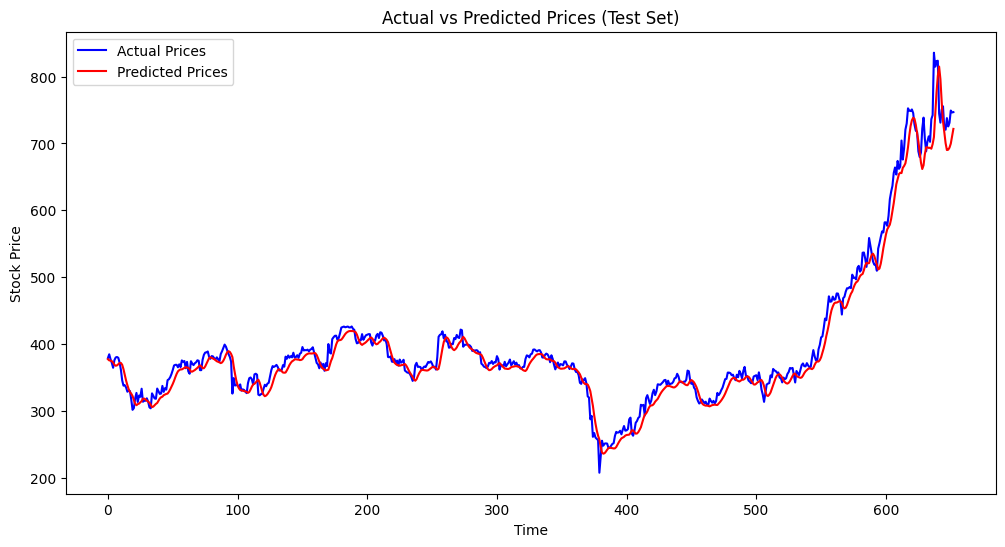

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Load the stock data (update path if needed)
stock_data = pd.read_csv('AdaniPorts.csv')

# Convert 'Date' column to datetime and sort by date
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')

# Use 'Close' price for prediction and scale it
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data['Scaled_Close'] = scaler.fit_transform(stock_data[['Close']])

# Prepare the data for LSTM
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set the time step (e.g., 60 days)
time_step = 60
scaled_data = stock_data['Scaled_Close'].values.reshape(-1, 1)
X, y = create_lstm_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define the train-test split ratio (e.g., 80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the sizes of the train and test sets
print(f'Train set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print metrics
print("\nLSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualization of predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


/tmp/ipython-input-3322783085.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type='bar')


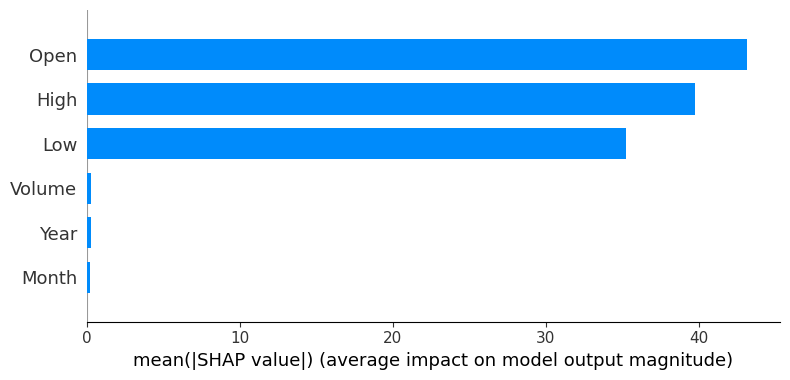

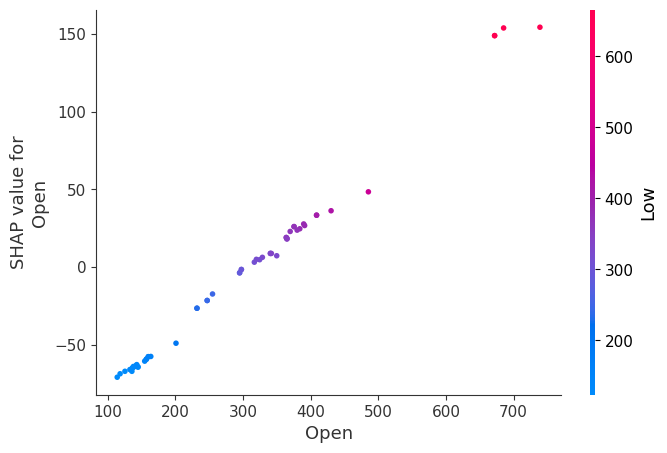

/tmp/ipython-input-3322783085.py:40: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


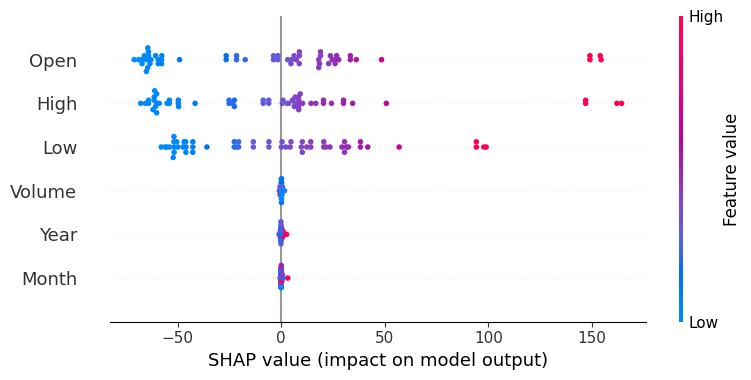

In [23]:
# Interpretability with SHAP
# Install SHAP if not already installed
!pip install shap

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Load the data
stock_data = pd.read_csv('AdaniPorts.csv')
economic_data = pd.read_csv('economic_indicators_dataset_2010_2023.csv')
# Data Preprocessing (same as before)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
economic_data['Date'] = pd.to_datetime(economic_data['Date'])
# Combine stock_data and economic_data here based on your earlier preprocessing steps
# Make sure `combined_data` is properly created and includes relevant features
# Feature and Target Selection
X = combined_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month']]
y = combined_data['Close']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
# Use the TreeExplainer for the Random Forest model
explainer = shap.TreeExplainer(random_forest_model)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)
# Summary plot (bar) - Displays the average importance of each feature
shap.summary_plot(shap_values, X_test, plot_type='bar')
# Dependence plot for a specific feature (e.g., 'Open')
# Replace 'Open' with the desired feature you want to examine
shap.dependence_plot('Open', shap_values, X_test)

# Summary plot (bee swarm) - Provides a detailed overview of feature importance
shap.summary_plot(shap_values, X_test)


In [25]:
# Model Comparison for Regression Models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Load the data
stock_data = pd.read_csv('AdaniPorts.csv')
economic_data = pd.read_csv('economic_indicators_dataset_2010_2023.csv')

# Data Preprocessing
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
economic_data['Date'] = pd.to_datetime(economic_data['Date'])

# Create Year and Month columns for stock data
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month

# Merge stock data and economic data
combined_data = pd.merge(stock_data, economic_data, on='Date', how='inner')

# Feature and Target Selection
X = combined_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month']]
y = combined_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Dictionary to store predictions
predictions = {}

# Train models and store predictions
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

# Initialize a list to store performance metrics
model_performance = []

# Evaluate each model and add results to performance list
for model_name, y_pred in predictions.items():
    if len(y_test) != len(y_pred):
        print(f"Warning: Length mismatch for {model_name} - y_test: {len(y_test)}, y_pred: {len(y_pred)}")
        continue

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)   # Fix: compute RMSE manually
    r2 = r2_score(y_test, y_pred)

    model_performance.append({
        'Model': model_name,
        'Mean Absolute Error': mae,
        'Root Mean Square Error': rmse,
        'R-squared': r2
    })

# Create DataFrame for comparison
performance_df = pd.DataFrame(model_performance)

# Display results
print("\nModel Comparison:")
print(performance_df)



Model Comparison:
                    Model  Mean Absolute Error  Root Mean Square Error  \
0       Linear Regression             3.022304                3.752742   
1           Random Forest             1.448754                2.956873   
2           Decision Tree             0.298246                1.398840   
3  Support Vector Machine           116.524323              152.851622   
4     K-Nearest Neighbors            38.004211               65.843317   

   R-squared  
0   0.999404  
1   0.999630  
2   0.999917  
3   0.011862  
4   0.816641  
